# Predictive maintenance of industrial machinery

_by Virginia Herrero_

## Dataset overview

The dataset used in this project is a synthetic dataset modeled after a milling machine, comprising 10,000 data points organized in rows with 14 distinct features in columns.

**Features**

* `UID`: unique identifier ranging from 1 to 10,000.

* `Product ID`: a combination of a letter (L, M, H) indicating quality (low, medium, high) with respective proportions of 50%, 30%, and 20%, followed by a variant-specific serial number.

* `Type`: product quality represented as a letter (L for low, M for medium, H for high).

* `Air temperature [K]`: generated using a random walk process, normalized to a standard deviation of 2 K around a mean of 300 K.

* `Process temperature [K]`: derived from a random walk process, normalized to a standard deviation of 1 K, and adjusted to the air temperature plus an additional 10 K.

* `Rotational speed [rpm]`: calculated based on a power output of 2860 W, with added normally distributed noise.

* `Torque [Nm]`: normally distributed around 40 Nm with a standard deviation of 10 Nm, ensuring all values are non-negative.

* `Tool wear [min]`: varies by quality variant, with additional wear times of 5, 3, and 2 minutes for high, medium, and low variants, respectively.

* `Machine failure`: a binary label indicating whether a machine failure occurred at this data point. It is set to 1 if at least one of the following independent failure modes is triggered:

    * `Tool Wear Failure (TWF)`: triggered when tool wear reaches a randomly selected time between 200 and 240 minutes.

    * `Heat Dissipation Failure (HDF)`: occurs if the temperature difference between air and process is below 8.6 K and rotational speed is below 1380 rpm.

    * `Power Failure (PWF)`: triggered when the power, calculated as the product of torque and rotational speed (in rad/s), falls below 3500 W or exceeds 9000 W.

    * `Overstrain Failure (OSF)`: occurs if the product of tool wear and torque exceeds thresholds (11,000 minNm for L, 12,000 for M, 13,000 for H).

    * `Random Failures (RNF)`: each process has a 0.1% probability of failing, independent of other parameters.

**Publication Reference**

This dataset is part of the following publication:

_S. Matzka, "Explainable Artificial Intelligence for Predictive Maintenance Applications," 2020 Third International Conference on Artificial Intelligence for Industries (AI4I), pp. 69-74._

## Data loading
Load the CSV file **predictive-maintenance-dataset-ai4i2020** as a pandas DataFrame.

In [1]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load the dataset
df = pd.read_csv("predictive-maintenance-dataset-ai4i2020.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


## Data cleaning
Clean and pre-process the dataset prior to conducting further analysis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

* **Remove unncessary columns**

The columns UDI and Product ID are indexes and lack predictive value; therefore, they are removed from the dataset.

In [4]:
df = df.drop(["UDI", "Product ID"], axis = 1)

* **Rename columns**

Some column names are renamed to enhance readability and improve comprehension of the dataset.

In [5]:
df.columns

Index(['Type', 'Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]',
       'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

In [6]:
df = df.rename(columns = {"Type" : "Product_quality",
                          "Air temperature [K]" : "Air_temperature_K",
                          "Process temperature [K]" : "Process_temperature_K",
                          "Rotational speed [rpm]" : "Rotational_speed_rpm",
                          "Torque [Nm]" : "Torque_Nm",
                          "Tool wear [min]" : "Tool_wear_min",
                          "Machine failure" : "Machine_failure"})

In [7]:
df.head()

,Product_quality,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


* **Data types**

Check that all columns have the appropriate data types.

In [8]:
df.dtypes

Product_quality           object
Air_temperature_K        float64
Process_temperature_K    float64
Rotational_speed_rpm       int64
Torque_Nm                float64
Tool_wear_min              int64
Machine_failure            int64
TWF                        int64
HDF                        int64
PWF                        int64
OSF                        int64
RNF                        int64
dtype: object

Set numerical features **Rotational_speed_rpm** and **Tool_wear_min** to float type.

In [9]:
df["Rotational_speed_rpm"] = df["Rotational_speed_rpm"].astype("float64")
df["Tool_wear_min"] = df["Tool_wear_min"].astype("float64")

* **Null values**

Identify and remove any missing values from the dataset as needed.

In [10]:
# Check the total of null values in each column
df.isna().sum()

Product_quality          0
Air_temperature_K        0
Process_temperature_K    0
Rotational_speed_rpm     0
Torque_Nm                0
Tool_wear_min            0
Machine_failure          0
TWF                      0
HDF                      0
PWF                      0
OSF                      0
RNF                      0
dtype: int64

The dataset has no missing values.

* **Duplicated values**

Check for duplicate entries in the dataset.

In [11]:
df.duplicated().sum()

np.int64(0)

The dataset has no duplicate values.

* **Outliers**

Examine the statistical summary of the dataset to identify potential outliers. This initial overview will help highlight any unusual values that may require further investigation.

In [12]:
df.describe()

,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


The torque and rotational speed statistics suggest the presence of outliers. However, as mentioned in the dataset overview, extreme values in these features are linked to machinery failure. Therefore, I have decided not to address these outliers to improve prediction accuracy. Nevertheless, the distributions of these two features will be plotted to visualize the extreme values.

Text(0.5, 0.98, 'Rotational Speed Distribution')

<Figure size 640x480 with 0 Axes>

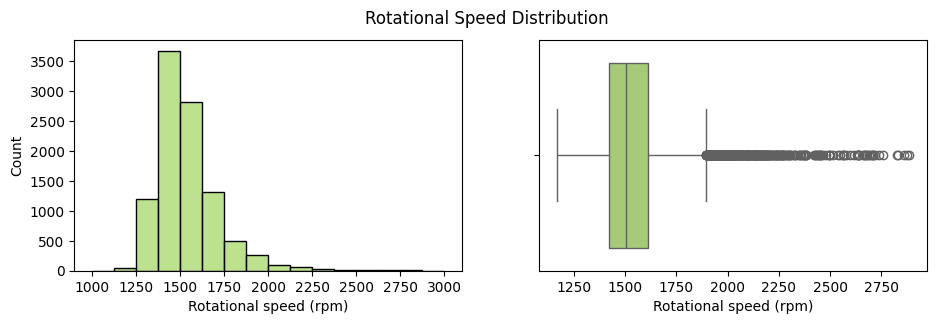

In [13]:
# Plot the rotational speed distribution using a histogram and boxplot
rotational_speed_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["Rotational_speed_rpm"], ax = ax[0], bins = 16, binrange = (1000, 3000), color = "#a6d96a")
sns.boxplot(x = df["Rotational_speed_rpm"], ax = ax[1], color = "#a6d96a")
ax[0].set_xlabel("Rotational speed (rpm)")
ax[1].set_xlabel("Rotational speed (rpm)")
plt.suptitle("Rotational Speed Distribution", size = 12)

Text(0.5, 0.98, 'Torque Distribution')

<Figure size 640x480 with 0 Axes>

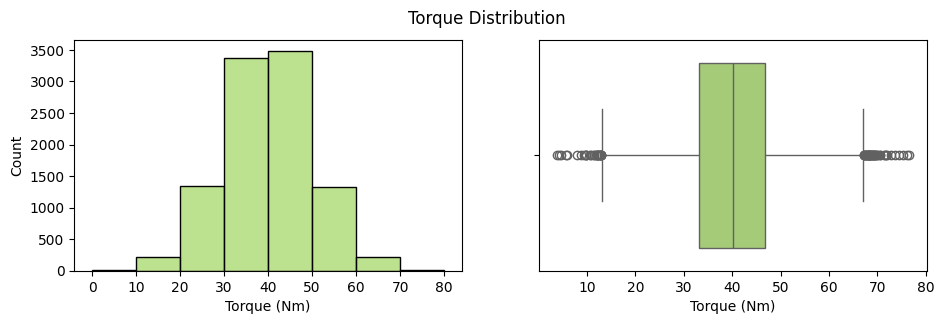

In [14]:
# Plot torque distribution using a histogram and boxplot
torque_distribution = plt.figure()
fig, ax = plt.subplots(1, 2, figsize = (11, 3))
sns.histplot(df["Torque_Nm"], ax = ax[0], bins = 8, binrange = (0, 80), color = "#a6d96a")
sns.boxplot(x = df["Torque_Nm"], ax = ax[1], color = "#a6d96a")
ax[0].set_xlabel("Torque (Nm)")
ax[1].set_xlabel("Torque (Nm)")
plt.suptitle("Torque Distribution", size = 12)

* **The clean dataset:**

In [15]:
predictive_maintenance = df.copy()
predictive_maintenance.head()

,Product_quality,Air_temperature_K,Process_temperature_K,Rotational_speed_rpm,Torque_Nm,Tool_wear_min,Machine_failure,TWF,HDF,PWF,OSF,RNF
0,M,298.1,308.6,1551.0,42.8,0.0,0,0,0,0,0,0
1,L,298.2,308.7,1408.0,46.3,3.0,0,0,0,0,0,0
2,L,298.1,308.5,1498.0,49.4,5.0,0,0,0,0,0,0
3,L,298.2,308.6,1433.0,39.5,7.0,0,0,0,0,0,0
4,L,298.2,308.7,1408.0,40.0,9.0,0,0,0,0,0,0


## Data exploration

In this section, an in-depth data exploratory analysis is carried out.

#### **Univariate exploration**

- **Features distribution**

The first step is to examine each feature in the dataset to obtain a general overview of their distributions. The histograms reveal that the data is imbalanced, particularly in the following features: **Product_quality, Machine _failure, TWF, HDF, PWF, OSF, and RNF**.

Imbalanced data occurs when one category in a dataset significantly outnumbers another, such as 90% in category A and 10% in category B. This can lead to biased models that favor the majority category, making it difficult to predict outcomes for the minority category. Techniques like resampling, adjusting category weights, or using specialized algorithms can help address this issue.

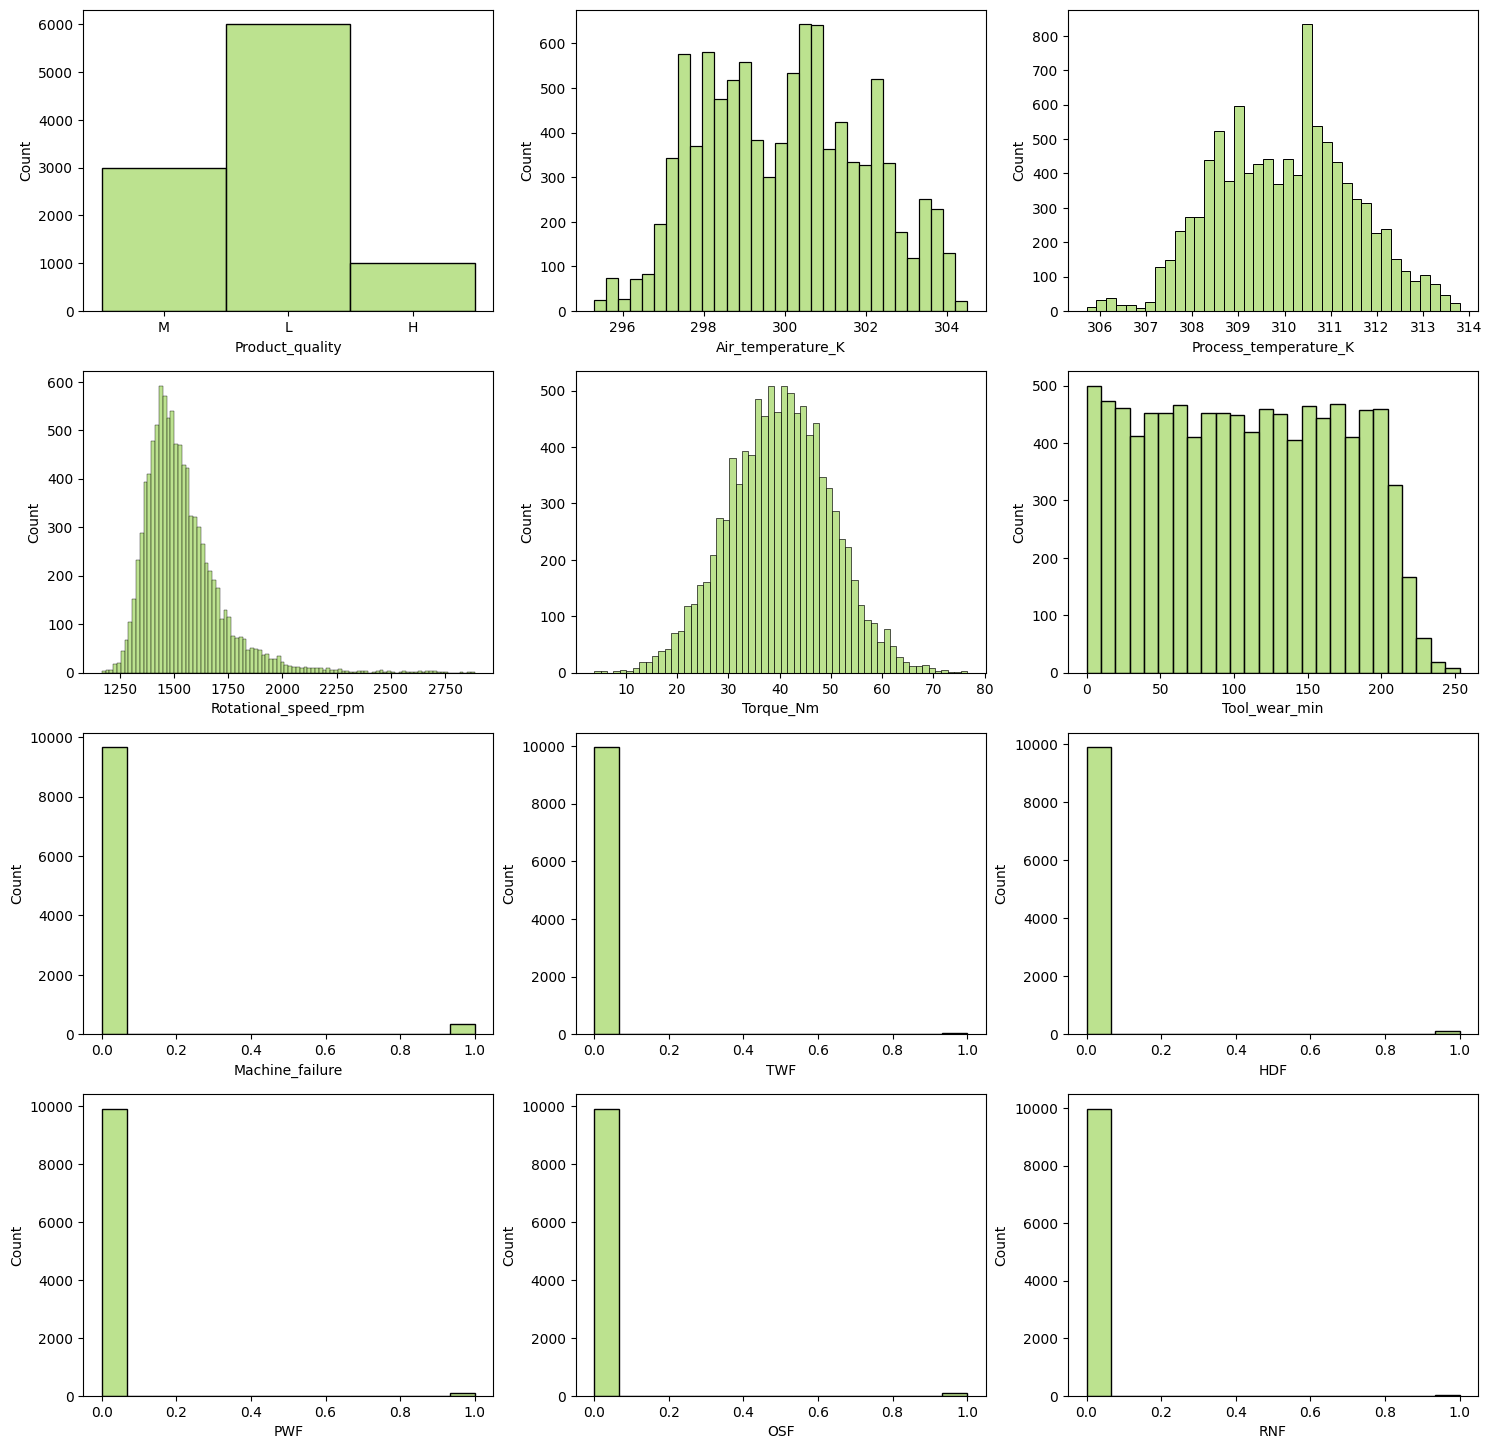

In [ ]:
# Plot distribution of all feature on the datasest
fig, ax = plt.subplots(4, 3, figsize = (18, 18))
for i, col in enumerate(predictive_maintenance.columns):
    sns.histplot(predictive_maintenance[col], ax = ax[i//3][i%3], color = "#a6d96a")

- **Product quality**

Let's examine the distribution of the product quality feature.

There are three different quality categories: low, medium, and high. The distribution is notably unbalanced, with the "low" quality category having significantly more observations compared to the other two categories.

In [ ]:
product_quality_dist = predictive_maintenance["Product_quality"].value_counts()
product_quality_dist

Product_quality
L    6000
M    2997
H    1003
Name: count, dtype: int64

Text(0.5, 1.0, 'Product Quality Distribution')

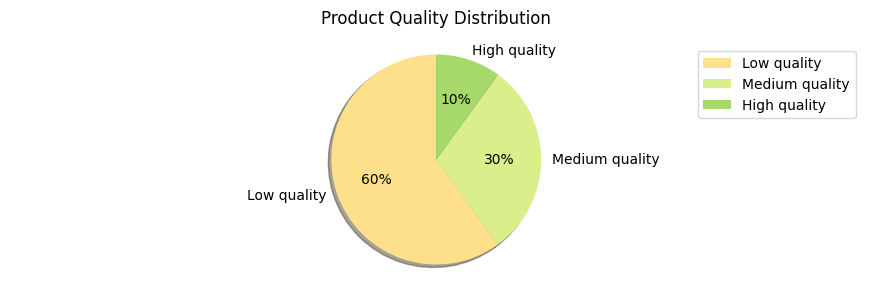

In [ ]:
labels = ["Low quality", "Medium quality", "High quality"]
colors = ["#fee08b", "#d9ef8b", "#a6d96a"]

product_quality_dist_graph = plt.figure(figsize = (11, 3))
plt.pie(product_quality_dist, labels = labels, colors = colors, startangle = 90, autopct="%1.0f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title("Product Quality Distribution", pad = 15)

- **Machine failure**

This column serves as the target variable for the project, which aims to predict machine failure. It is a binary column containing values of 1 and 0. The histogram above indicates an imbalanced dataset; however, a more detailed analysis will be conducted to explore this further.

In [ ]:
machine_failure_dist = predictive_maintenance["Machine_failure"].value_counts()
machine_failure_dist

Machine_failure
0    9661
1     339
Name: count, dtype: int64

Text(0.5, 1.0, 'Machine Failure Distribution')

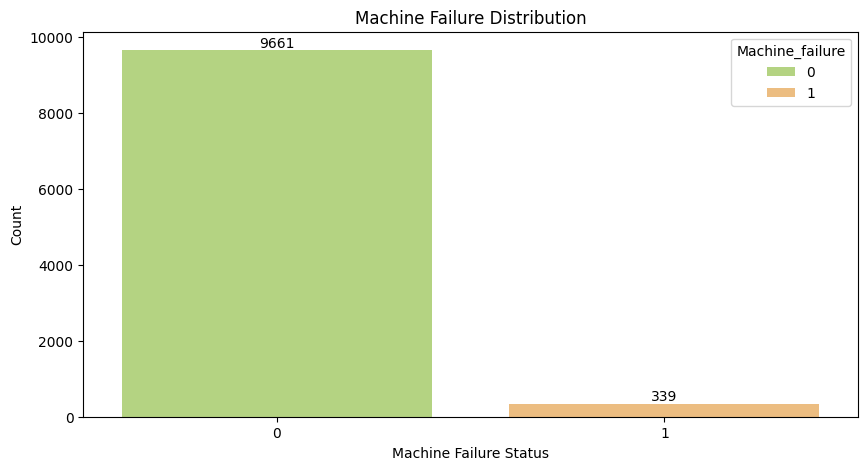

In [ ]:
machine_failure_dist_graph = plt.figure(figsize = (10, 5))
ax = sns.countplot(predictive_maintenance, x = "Machine_failure", hue = "Machine_failure", palette = "RdYlGn_r")
for i in ax.containers:
    ax.bar_label(i,)
plt.xlabel("Machine Failure Status")
plt.ylabel("Count")
plt.title("Machine Failure Distribution", size = 12)

Text(0.5, 1.0, 'Machine Failure Distribution')

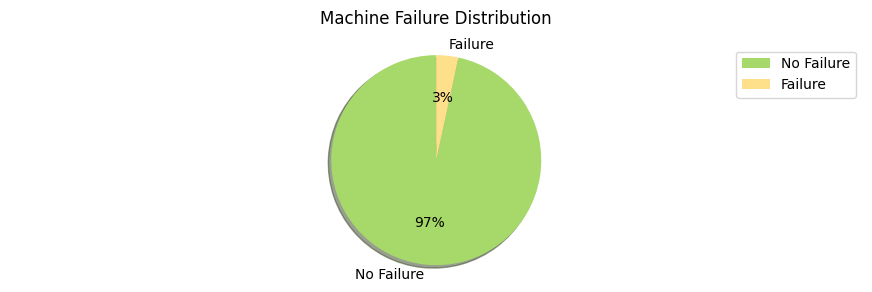

In [ ]:
labels = ["No Failure", "Failure"]
colors = [ "#a6d96a", "#fee08b"]

machine_failure_percentage_graph = plt.figure(figsize = (11, 3))
plt.pie(machine_failure_dist, labels = labels, colors = colors, startangle = 90, autopct="%1.0f%%", shadow = True)
plt.axis("equal")
plt.legend()
plt.title("Machine Failure Distribution", pad = 15)

- **Machine failure percentage by product quality**

The low-quality product has a higher machine failure rate of 4%, while the medium-quality product has a failure rate of 3%. In contrast, the high-quality product demonstrates the lowest failure rate at 2%.

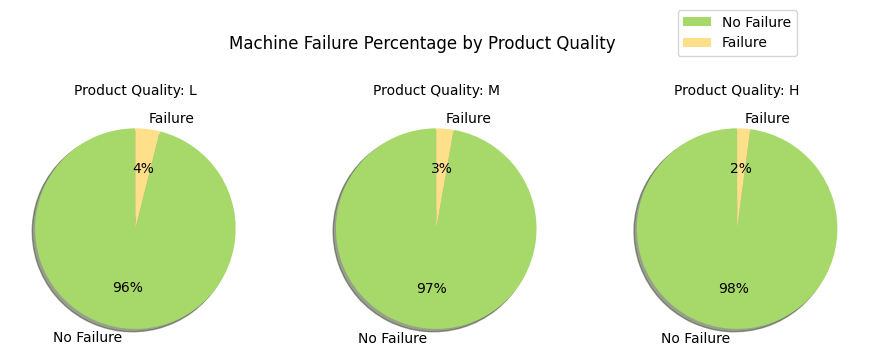

In [ ]:
labels = ["No Failure", "Failure"]
colors = ["#a6d96a", "#fee08b"]

fig, ax = plt.subplots(1, 3, figsize=(11, 4))

ax = ax.flatten()

for j, quality in enumerate(["L", "M", "H"]):
    df_product_type = predictive_maintenance[predictive_maintenance["Product_quality"] == quality]
    ax[j].pie(df_product_type["Machine_failure"].value_counts(), labels = labels, colors = colors, startangle = 90, autopct = "%1.0f%%", shadow = True)
    ax[j].set_title(f"Product Quality: {quality}", size = 10)

plt.suptitle("Machine Failure Percentage by Product Quality", size = 12)
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.4))

- **Type of failure**

There are five different types of failures: TWF, HDF, PWF, OSF, RNF.

The machine failure distribution bar plot illustrates that the most frequent machine failure is HDF, followed by OSF. In contrast, RNF has the fewest observations, which is expected, as it represents a random failure occurring at a rate of just 0.1%, regardless of the parameters.

In [ ]:
# Create a dataframe containing only the different types of machine failure
machine_failure_types = predictive_maintenance.loc[:, ["TWF", "HDF", "PWF", "OSF", "RNF"]]

In [ ]:
# Sum the number of times a failure was registered in the dataset
sum_failures = machine_failure_types.sum().sort_values(ascending=True)
sum_failures

RNF     19
TWF     46
PWF     95
OSF     98
HDF    115
dtype: int64

Text(0.5, 1.0, 'Machine Failure Type Distribution')

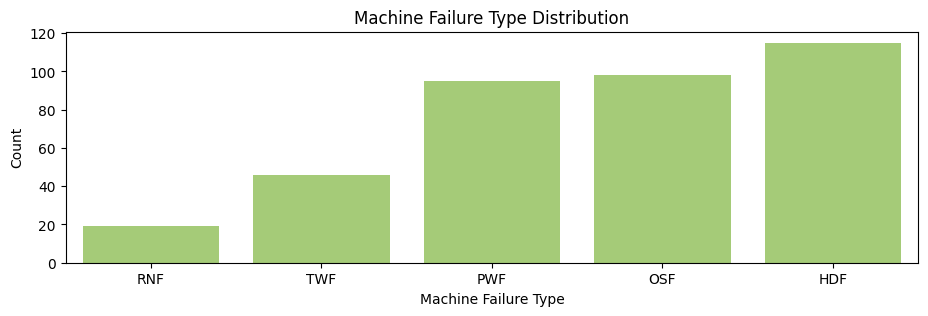

In [ ]:
failure_types_distribution_graph = plt.figure(figsize = (11, 3))
sns.barplot(sum_failures, color = "#a6d96a")
plt.xlabel("Machine Failure Type")
plt.ylabel("Count")
plt.title("Machine Failure Type Distribution", size = 12)

An additional step will be taken to investigate whether multiple failures occur simultaneously.

In [ ]:
# Sum failure values per row
sum_rows = machine_failure_types.sum(axis = 1)

Text(0.5, 1.0, 'Distribution of Simultaneous Failures')

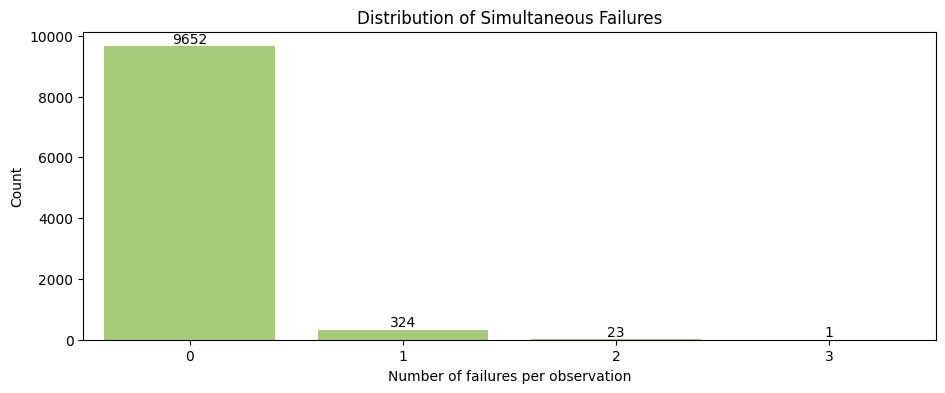

In [ ]:
# Plot count of failure types happening simultaneously
count_simultaneous_failures = plt.figure(figsize = (11, 4))
ax = sns.countplot(x = sum_rows, color = "#a6d96a")
for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", (p.get_x() + p.get_width() / 2, p.get_height()), ha = "center", va = "bottom")
plt.xlabel("Number of failures per observation")
plt.ylabel("Count")
plt.title("Distribution of Simultaneous Failures", size = 12)

Some observations experience multiple failures simultaneously, although the frequency is quite low. Specifically, there are 23 instances of two machine failures occurring at the same time, and one instance of three machine failures happening simultaneously

- **Type of machine failure per product quality**

In [ ]:
failure_types = ["TWF", "HDF", "PWF", "OSF", "RNF"]

failure_per_quality = pd.DataFrame()

for type in failure_types: 
    sum = predictive_maintenance.groupby("Product_quality")[type].sum()
    failure_per_quality = pd.concat([failure_per_quality, sum], axis = 1)

array([[<Axes: title={'center': 'TWF'}>, <Axes: title={'center': 'HDF'}>,
        <Axes: title={'center': 'PWF'}>, <Axes: title={'center': 'OSF'}>,
        <Axes: title={'center': 'RNF'}>]], dtype=object)

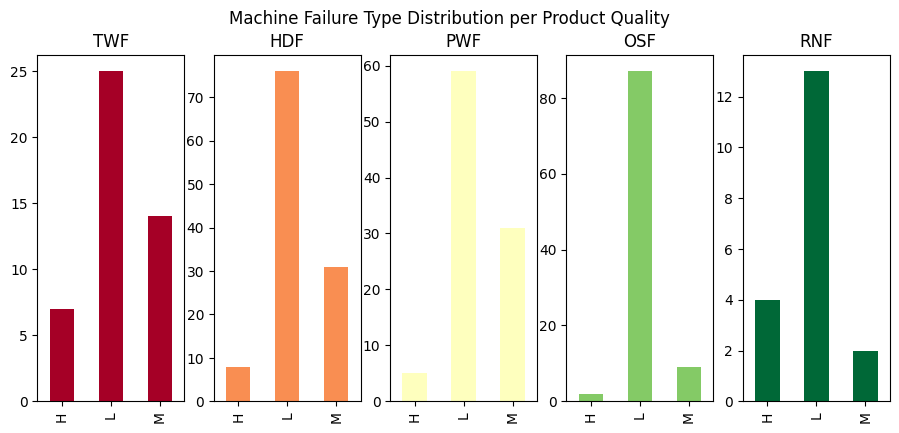

In [ ]:
failure_per_quality.plot(figsize = (11, 4.5), subplots=True, layout= (1,5), legend = False,
                         kind = "bar", colormap = "RdYlGn", title = "Machine Failure Type Distribution per Product Quality")

It has already been established that low-quality products have a higher percentage of machine failures. Analyzing each failure type individually reveals a consistent pattern: products with lower quality experience more failures, while higher quality products have fewer failures. However, in the case of RNF failures, it was observed that the failure rate is higher for high-quality products compared to medium-quality ones.

- **Drop the RNF failures**

RNF represents a random failure occurring at a rate of just 0.1%, regardless of the parameters, it lacks predictive value therefore it is drop from the dataset.

In [ ]:
predictive_maintenance = predictive_maintenance.drop("RNF", axis = 1)

**In Summary:**

- There are three types of product quality: low, medium, and high.
- Machine failures account for only 3% of the observations in the dataset.
- The incidence of machine failures is notably higher among lower-quality products.
- There are five types of machine failures: TWF, HDF, PWF, OSF, and RNF.
- The most frequent failures are HDF, OSF, and PWF.
- For all types of machine failures, lower-quality products exhibit a higher failure count, with the exception of RNF failures.